In [ ]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from scipy.stats import pearsonr
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import (
    mean_absolute_error, # MAE
    mean_squared_error # MSE
)

In [ ]:
df = pd.read_csv('vendedoresrh.csv', delimiter=';', decimal=',')

In [ ]:
df.head()

ID  Nota_mEdia   Desempenho
0   1         7.50        81.0
1   2         8.25        95.0
2   3         9.25        71.0
3   4        10.25        94.0
4   5        10.50        82.0

Removendo espaços em branco no nome das colunas

In [ ]:
df.columns = df.columns.str.strip()

Plotando gráfico de dispersão entre as variáveis de interesse

<Axes: xlabel='Nota_mEdia', ylabel='Desempenho'>

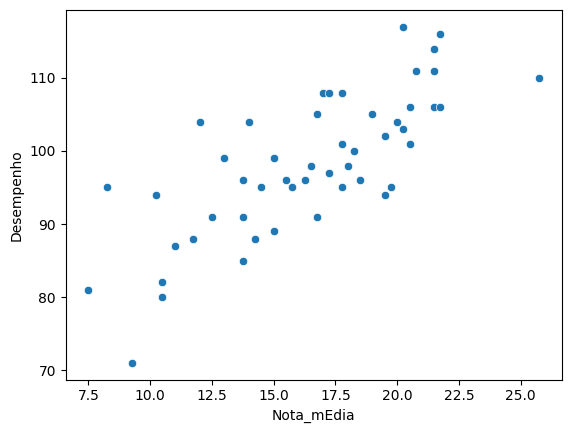

In [ ]:
sbn.scatterplot(x = 'Nota_mEdia', y = 'Desempenho', data = df)

Calculando a correlação de Pearson

In [ ]:
pearsonr(df['Nota_mEdia'], df['Desempenho'])


PearsonRResult(statistic=0.7621262240493802, pvalue=1.2828363756657115e-10)

sbn.hist(y = 'Desempenho', data = df)

<Axes: xlabel='Desempenho', ylabel='Count'>

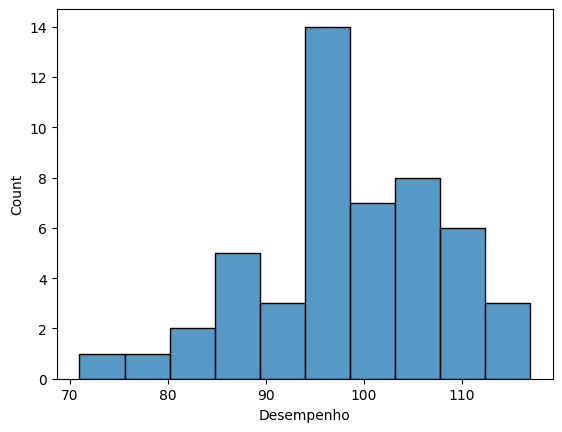

In [ ]:
sbn.histplot(x = 'Desempenho', data = df, bins = 10)

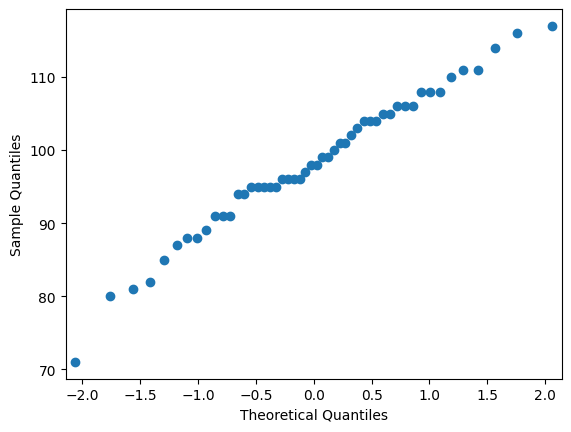

In [ ]:
sm.qqplot(df['Desempenho'])
plt.show()

**Teste de Normalidade de Shapiro Wilks**

In [ ]:
stats.shapiro(df['Desempenho'])

ShapiroResult(statistic=0.9837684570670189, pvalue=0.7176472808181578)

**Modelo de Regressão Linear**

In [ ]:
# Separar variável resposta de explicativas

y = df['Desempenho']
X = df['Nota_mEdia']

In [ ]:
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(X)

# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
modelo = sm.OLS(y, X_sm).fit()

# mostrando as estatísticas do modelo
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Desempenho   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     66.51
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           1.28e-10
Time:                        20:14:27   Log-Likelihood:                -162.22
No. Observations:                  50   AIC:                             328.4
Df Residuals:                      48   BIC:                             332.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.5097      3.754     18.251      0.000      60.962      76.057
Nota_mEdia     1.8101      0.222      8.156      0.000       1.364       2.256
==============================================================================
Omnibus:                        0.813   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.666   Jarque-Bera (JB):                0.906
Skew:                           0.239   Prob(JB):                        0.636
Kurtosis:                       2.545   Cond. No.                         71.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Valores residuais**

In [ ]:
# Construção de diagnóstico para os gráficos
modelo_ajust_y = modelo.fittedvalues # Valores do modelo ajustados
modelo_residuos = modelo.resid # Residuos
modelo_norm_resid = modelo.get_influence().resid_studentized_internal # Residuos normalizados
modelo_norm_resid_abs = np.sqrt(np.abs(modelo_norm_resid)) # Quadrados dos residuos normalizados
modelo_outliers = modelo.get_influence().hat_matrix_diag # Outliers
distancia_cook = modelo.get_influence().cooks_distance[0] # Distanci de Cook

Text(0, 0.5, 'Residuals')

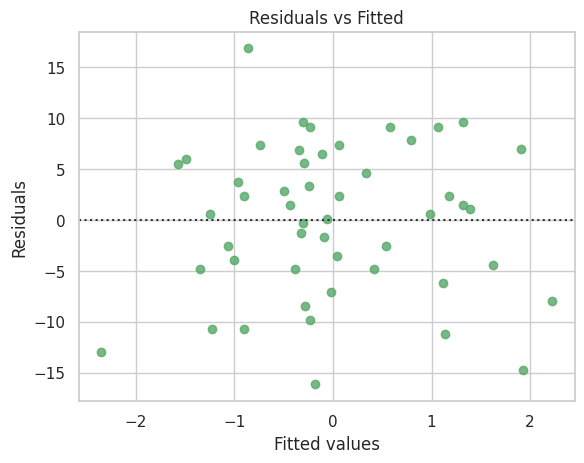

In [ ]:
plot_lm = plb.figure()
plot_lm = sbn.residplot(x = modelo_norm_resid, y = modelo_ajust_y, lowess=False, color="g")
plot_lm.set_title('Residuals vs Fitted')
plot_lm.set_xlabel('Fitted values')
plot_lm.set_ylabel('Residuals')

**MAE**

In [ ]:
MAE = mean_absolute_error(
    y_true = y, # valor verdadeiro
    y_pred = modelo_ajust_y # predições
)
MAE.round(2)

4.96

**MSE**

In [ ]:
MSE = mean_squared_error(
    y_true= y, # valor verdadeiro
    y_pred= modelo_ajust_y # predições
)
MSE.round(2)

38.51

**RMSE**

In [ ]:
RMSE = MSE**(1/2)
RMSE.round(2)

6.21